In [17]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import torch.nn.functional as F

In [18]:
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [19]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

<function matplotlib.pyplot.show(close=None, block=None)>

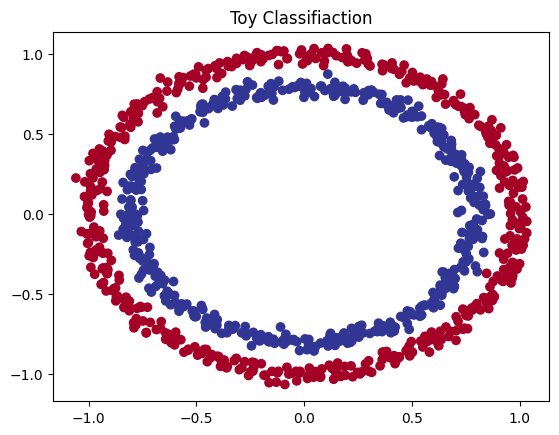

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Toy Classifiaction")
plt.show

In [21]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=5)
    self.layers_2=nn.Linear(in_features=5, out_features=1)
  def forward(self,x):
    x=F.relu(self.layer_1(x))
    x=self.layers_2(x)
    return x

In [22]:
torch.manual_seed(42)
model_0=CircleModelV0()
print(model_0)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layers_2): Linear(in_features=5, out_features=1, bias=True)
)


In [26]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=1)

epochs=100
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%10==0:
    print(f"Epoch:{epoch} loss:{loss}")
  model_0.eval()


Epoch:0 loss:0.6092876195907593
Epoch:10 loss:0.5906286239624023
Epoch:20 loss:0.5700719952583313
Epoch:30 loss:0.5476467609405518
Epoch:40 loss:0.5232930779457092
Epoch:50 loss:0.4977412819862366
Epoch:60 loss:0.7699081897735596
Epoch:70 loss:0.533961832523346
Epoch:80 loss:0.6001602411270142
Epoch:90 loss:0.5532196760177612


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


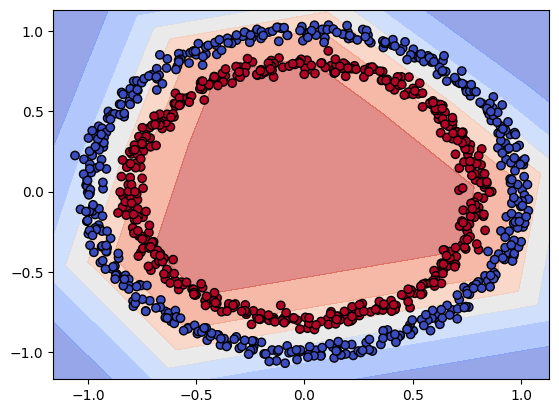

In [31]:

def plot_decision_boundary(model, X, y):
    model.eval()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01),
                            torch.arange(y_min, y_max, 0.01))
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)

    with torch.no_grad():
        preds = torch.sigmoid(model(grid))
        preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, cmap='coolwarm', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.show()
plot_decision_boundary(model_0, X, y)


In [27]:
from sklearn.metrics import accuracy_score
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
accuracy_score= accuracy_score(y_pred,y)
print(f"Accuracy:{accuracy_score}")


Accuracy:0.692


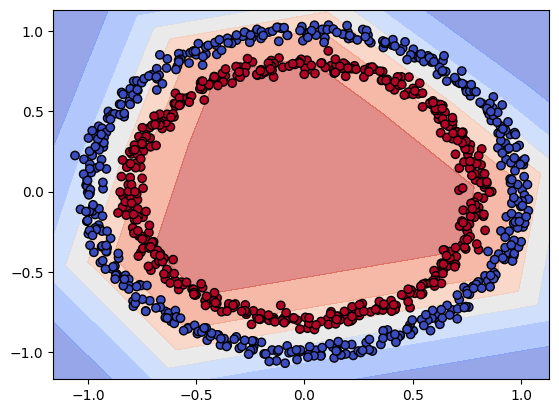

In [32]:
plot_decision_boundary(model_0,X,y)

In [33]:
MODEL_PATH = "circle_model.pth"
torch.save(obj=model_0.state_dict(),
           f=MODEL_PATH)

In [34]:
from google.colab import files
files.download(MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>